In [ ]:
Иванов Денис
Домашнее задание "Визуализация данных"

In [ ]:
Построить 5 визуализации различных видов по выбранным данным, 
используя хотя бы две из рассмотренных на занятии библиотек.
Для каждой визуализации описать, какого типа переменные участвуют 
в визуализации, какова её цель и какие гипотезы на ее основе можно выдвинуть.

In [150]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go


large = 12; small = 8
params = {'axes.titlesize': large,
          'legend.fontsize': small,
          'figure.figsize': (18, 36),
          'axes.labelsize': large,
          'axes.titlesize': large,
          'xtick.labelsize': small,
          'ytick.labelsize': small,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
#sns.set_style("white")
%matplotlib inline

In [ ]:
mdb =  pd.read_csv('tmdb_5000_movies.csv', sep=',')
mdb1 = mdb.iloc[:, [17, 1, 11, 18, 0, 12 ]]
mdb1.columns = ['title', 'genres', 'release_date',  'vote_average', 'budget', 'revenue']
mdb1['рентабельность'] = 100 * (mdb['revenue'] - mdb['budget']) / mdb['budget']
mdb1['бюджет'] = 100 * mdb['budget'] / 1000000
mdb1 = mdb1.loc[(mdb.budget > 0) &
                (mdb.vote_count > 10) &
                (mdb.vote_average > 0) &
                (mdb.revenue > 0) &
                (mdb.release_date > '1970-01-01')]

In [161]:
g_type = {
'Боевик':  ['Action',  'War', 'Western'],
'Триллер':['Thriller', 'Horror', 'Science Fiction'],
'Семейный':  ['Animation','Family', 'Fantasy'],
'Серьезный': ['Biography','Drama','History', 'Documentary', 'Music', 'Crime'],
'Комедия': ['Comedy','Adventure','Romance']
}

def classify_genre(row):
    m = 0
    top_genre = 0
    for key, value in g_type.items():
        z = 0
        for i in value:
            z += row.genres.count(i)
        if z > m:
            top_genre = key
            m = z 
    return top_genre

def classify_release_year (row):
    if  row.release_date < '1980-01-01':
        return '1970s'
    elif row.release_date < '1990-01-01':
        return '1980s'
    elif row.release_date < '2000-01-01':
        return '1990s'
    elif row.release_date < '2010-01-01':
        return '2000s'
    elif row.release_date < '2020-01-01':
        return '2010s'            
    else:
        return '2020s'

def classify_country(row):
    for i in row:
        z += row.genres.count(i)
        if z > m:
            top_genre = key
            m = z 
    return top_genre
    
mdb1['genres_type']=mdb1.apply(classify_genre, axis=1)
mdb1['release_era']=mdb1.apply(classify_release_year, axis=1)
mdb1.sort_values(['release_era'], ascending = True)  
mdb1.iloc[:, 2:].head()

,release_date,vote_average,budget,revenue,рентабельность,бюджет,genres_type,release_era
0,2009-12-10,7.2,237000000,2787965087,1076.356577,23700.0,Боевик,2000s
1,2007-05-19,6.9,300000000,961000000,220.333333,30000.0,Боевик,2000s
2,2015-10-26,6.3,245000000,880674609,259.459024,24500.0,Боевик,2010s
3,2012-07-16,7.6,250000000,1084939099,333.975640,25000.0,Серьезный,2010s
4,2012-03-07,6.1,260000000,284139100,9.284269,26000.0,Боевик,2010s


Text(0.5, 1.0, 'История изменений среднего рейтинга IMDB')

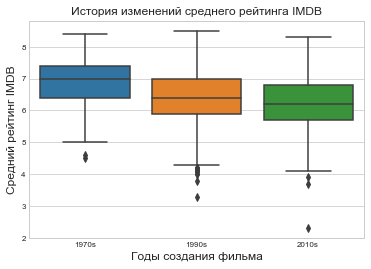

In [159]:
#1  История изменений среднего рейтинга IMDB

g1 = sns.boxplot(  x="release_era", 
                    y="vote_average", 
                    data = mdb1.loc[
                        (mdb1.release_era == '1970s') |
                        (mdb1.release_era == '1990s') |
                        (mdb1.release_era == '2010s') ]
                     .sort_values(['release_era'], ascending = True) 
                )
g1.set_xlabel('Годы создания фильма') 
g1.set_ylabel('Средний рейтинг IMDB') 
g1.set_title( 'История изменений среднего рейтинга IMDB') 

Цель анализа  - выявить закономерности изменения среднего рейтинга фильмов, выпущенных в прокат в разные годы и получивших оценки на сайте imdb.com.
Использованы 3 (наиболее характерных) периода - интервалы по 10 лет (1970е 1990е и 2010е годы)

Гипотезы:
а) снижение уровня средних оценок: падает средний рейтинг в целом по выборке фильмов
б) уменьшение количества хороших фильмов, больше плохих (в 70е средняя смещена выше медианы / в 2010е - ниже медианы)
в) Наилучшие оценки отдельных фильмов девяностых
г) выбросы вниз по фильмам 2010 х - предполагаю оценка еще по некоторым фильмам не сформирована - малое количество наблюдений


Text(0.5, 1.0, 'История изменений среднего рейтинга IMDB / по жанрам')

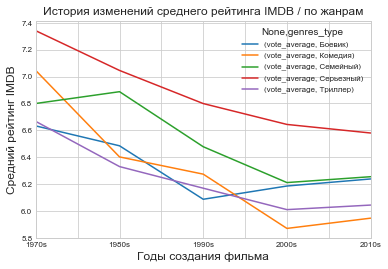

In [172]:
# История изменений среднего рейтинга IMDB / по жанрам

table_1 = pd.pivot_table(mdb1, 
                         values =['vote_average'], 
                         index  = 'release_era', 
                         columns = 'genres_type', 
                         aggfunc = 'mean') 
g4 = table_1.plot()
g4.set_xlabel('Годы создания фильма') 
g4.set_ylabel('Средний рейтинг IMDB') 
g4.set_title( 'История изменений среднего рейтинга IMDB / по жанрам') 

In [ ]:
Наиболее ровные жанровые оценки во времени - серьезное кино и триллеры
Наибольшая волатильность оценок во времени :  семейное кино и комедии
Глубину падения комедий надо смотреть глубже

In [133]:
# Распределение среднего рейтинга по основным группам жанров

g2 = px.box(mdb1.sort_values(['genres_type']), 
            x="genres_type", 
            y="vote_average", 
            title="Распределение среднего рейтинга по основным группам жанров",
           )     
           
g2.show()

Цель анализа  - выявить закономерности изменения среднего рейтинга фильмов,  получивших оценки на сайте imdb.com.  Поскольку в первоисточнике одному фильму может быть присвоено несколько жанров, в расчетах использованы следующие допущения.  Все жанры imdb классифицированы на 5 Групп
    Боевик:    ['Action',  'War', 'Western'],
    Триллер:   ['Thriller', 'Horror', 'Science Fiction'],
    Семейный:  ['Animation','Family', 'Fantasy'],
    Серьезный: ['Biography','Drama','History', 'Documentary', 'Music', 'Crime'],
    Комедия:   ['Comedy','Adventure','Romance']
Каждому фильму из множества присущих жанров рассчитывается рейтинг каждой Группы.
Например:  фильм классифицирован imdb по жанрам: Action, Science Fiction, Animation, Family
в классификаторе 1 признак боевика, 1 признак "триллера" и 2 признака семейного фильма 
Группа с наибольшим рейтингом  присваивается как жанровый классификатор фильма / - фильм 
признается семейным.
Группы подобраны таким образом чтобы выборки фильмов по результатам классификации были сопоставимы 
по количеству


Гипотезы: 
а) самый высокий уровень рейтинга у серьезного кино/ по всем средним  и абсолютному максимуму
выбросы вниз скорее всего обусловлены  издержками классификации / необычные сочетания жанров
б) наихудший уровень рейтинга у комедий, большое количество  выбросов как вверх так и вниз
медиана кажется ниже средней - плохих комедий больше чем хороших 

In [165]:
# История среднего рейтинга IMDB: серьезное кино и комедии
mdb2 = mdb1.sort_values(['release_era'], ascending = True) 
g3 = go.Figure()
g3.add_trace(go.Violin(x=mdb2['release_era'][ mdb2['genres_type'] == 'Серьезный' ],
                        y=mdb2['vote_average'][ mdb2['genres_type'] == 'Серьезный' ],
                        name='Сурьёзно',
                        line_color='blue')
             )
g3.add_trace(go.Violin(x=mdb2['release_era'][ mdb2['genres_type'] == 'Комедия' ],
                        y=mdb2['vote_average'][ mdb2['genres_type'] == 'Комедия' ],
                        name='Комедии',
                        line_color='orange')
             )
g3.update_traces(box_visible=True, meanline_visible=True)
g3.update_layout(violinmode='group')
g3.update_layout(title='История среднего рейтинга IMDB: серьезное кино и комедии',
                   xaxis_title='Годы создания фильма',
                   yaxis_title='Средний рейтинг IMDB')

g3.show()

Остановимся на 2 наиболее популярных жанрах и посмотрим как изменялаись средние в динамике по жанрам
70 е году - оценки очевидно лучше и скученнее - сформировалось мнение в целом по сообществу - возможно потому что при imdb создан много позднее 70х когда уже сформировалось мнение сообщества и нет экстремальных эмоциональых оценок, а может быть средний уровень был много выше
По серьезному кино зрители более единодушны - фигуры шире большее количество респондентов придерживаются одинаковых средних мнений
в 2000е боьшое количество очень плохих оценок - спад жанров - надо проверить

              бюджет                                     
genres_type   Боевик  Комедия Семейный Серьезный  Триллер
release_era                                              
1970s        1206.63   367.78  1617.50    701.14   864.27
1980s        2171.95  1919.23  1635.00   1514.43  1072.00
1990s        5461.18  2866.47  4835.02   2762.83  3813.97
2000s        6839.85  3385.33  7436.26   2832.74  4131.68
2010s        8557.60  3742.23  9543.54   2498.44  3321.30


Text(0.5, 1.0, 'Динамика изменения средней стоимости фильма по жанрам')

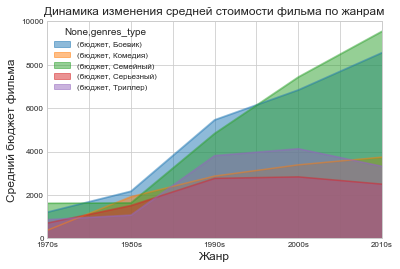

In [173]:
# Динамика изменения средней стоимости фильма по жанрам

table_2 = pd.pivot_table(mdb1, 
                         values =['бюджет'], 
                         index =  'release_era',
                         columns = 'genres_type',  
                         aggfunc = 'mean').round(2)
print(table_2)

g5 = table_2.plot(kind='area',  stacked=False)
g5.set_xlabel('Жанр') 
g5.set_ylabel('Средний бюджет фильма') 
g5.set_title( 'Динамика изменения средней стоимости фильма по жанрам')

Гипотезы: 
снижение стоимости производства фильмов жанра триллер и научная фантастика - нерентабельно или выезжают на содержании
резкий рост стоимости производста анимационных и семейных фильмов